In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
original_df = pd.read_csv('../data/preprocessed_data.csv')
df = pd.read_csv('../data/cleaned_data.csv')

In [31]:
original_df

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
2,50,Male,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,32,Venmo,Weekly
3896,52,Female,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,24,Venmo,Quarterly
3898,44,Female,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,24,Venmo,Weekly


In [32]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(X, sample_size=0.05):
    """
    Compute the Hopkins statistic for the dataset X
    :param X: Array-like, shape (n_samples, n_features)
              The data to compute the Hopkins statistic for.
    :param sample_size: Float, optional, default: 0.05
                        The proportion of the dataset to use for the test.
    :return: Float, the Hopkins statistic
    """
    if isinstance(sample_size, float):
        n_samples = int(sample_size * X.shape[0])
    else:
        n_samples = sample_size

    # Randomly sample n_samples points from X
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(X.shape[0], n_samples, replace=False)
    random_points = X[random_indices]

    # Generate n_samples random points in the same space as X
    min_vals, max_vals = np.min(X, axis=0), np.max(X, axis=0)
    synthetic_points = np.random.uniform(low=min_vals, high=max_vals, size=(n_samples, X.shape[1]))

    # Calculate distances to the nearest neighbor in the original data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    w_distances, _ = nbrs.kneighbors(random_points)
    u_distances, _ = nbrs.kneighbors(synthetic_points)

    # Calculate the Hopkins statistic
    H = np.sum(w_distances) / (np.sum(w_distances) + np.sum(u_distances))
    return H

In [33]:
# Calculate Hopkins statistic
X = df.values

hopkins_stat = hopkins_statistic(X, sample_size=0.05)
print(f'Hopkins Statistic: {hopkins_stat}')

Hopkins Statistic: 2.3842286317133376e-09


In [ ]:
# Calculate Hopkins statistic
hopkins_stat = hopkins_statistic(X, sample_size=0.05)
print(f'Hopkins Statistic: {hopkins_stat}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.20190481416618775


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.1167648292352672


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.07860500817245226


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.06987188574883792


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.06527240149712929


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.0576022874846147


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.0514299227610532


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.0528711923966765


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.04632862625971392


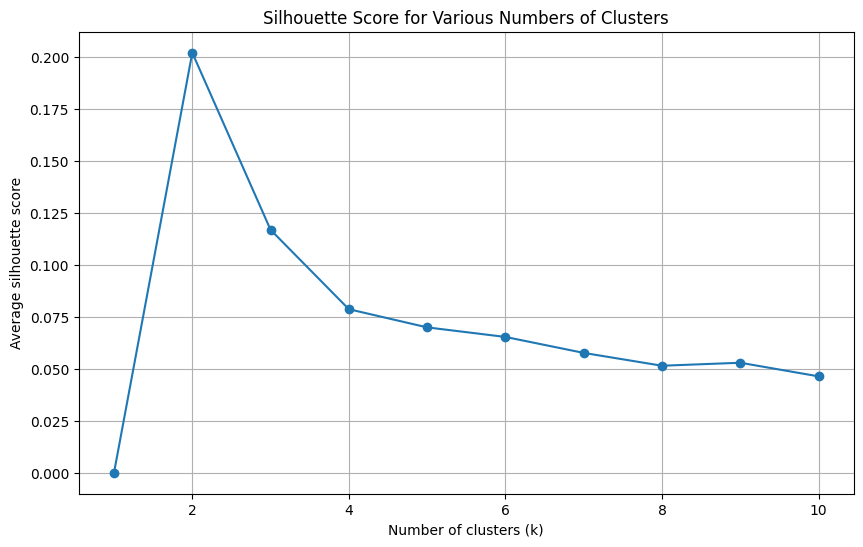

In [26]:
# Convert to numpy array
X = df.values

# Range of number of clusters to try
range_n_clusters = range(1, 11)  # from 1 to 10 clusters

# List to hold silhouette scores
silhouette_avg_list = []

# Calculate silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    if n_clusters == 1:
        silhouette_avg_list.append(0)
        continue
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.20190481416618775


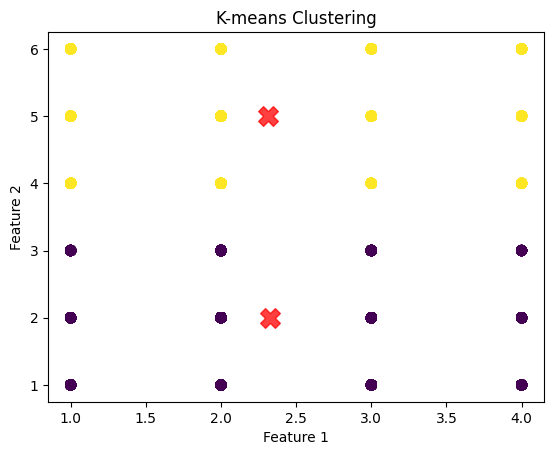

In [27]:
# KMeans clustering

# Convert the dataframe into a numpy array
X = df.values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()